In [1]:
%pip install MiniSom

  Using cached MiniSom-2.3.3.tar.gz (11 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.3-py3-none-any.whl size=11709 sha256=6b9a235b8f413381e845486b998271b6e8ab8d2a4e1e16ba207e1790fc8ded7b
  Stored in directory: /home/halozhan/.cache/pip/wheels/ff/12/f1/df07e624e92f1db66ad8376da65ab75cf6eb4de80792a30627
Successfully built MiniSom

[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# 코드 11-16 라이브러리 호출 및 데이터셋 내려받기
import numpy as np
from sklearn.datasets import load_digits
from minisom import MiniSom
from pylab import plot, axis, show, pcolor, colorbar, bone

digits = load_digits()  # 숫자 필기 이미지 데이터셋 내려받기
data = digits.data  # 훈련 데이터셋
labels = digits.target  # 정답(레이블)

SOM 초기화.

. SOM 진행 종료


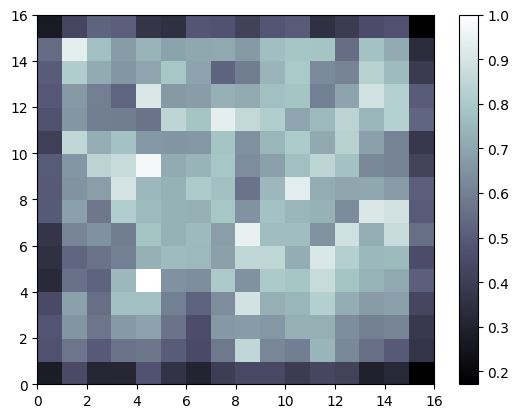

In [3]:
# 코드 11-17 훈련 데이터셋을 MiniSom 알고리즘에 적용
som = MiniSom(16, 16, 64, sigma=1.0, learning_rate=0.5)  # ①
som.random_weights_init(data)
print("SOM 초기화.")
som.train_random(data, 10000)
print("\n. SOM 진행 종료")

bone()
pcolor(som.distance_map().T)
colorbar()

/tmp/ipykernel_65978/3388126579.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == "0"] = 0  # 레이블 설정
/tmp/ipykernel_65978/3388126579.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == "1"] = 1
/tmp/ipykernel_65978/3388126579.py:5: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == "2"] = 2
/tmp/ipykernel_65978/3388126579.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == "3"] = 3
/tmp/ipykernel_65978/3388126579.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels[labels == "4"] = 4
/tmp/ipykernel_65978/338812657

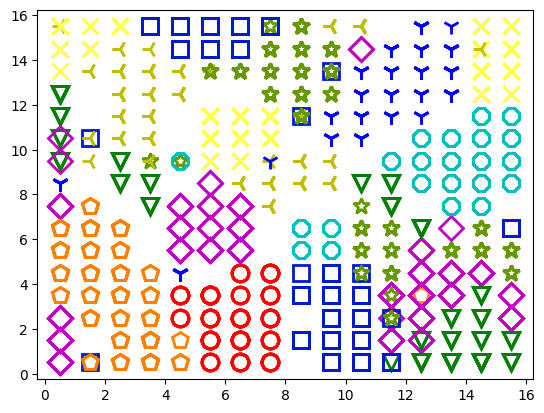

In [4]:
# 코드 11-18 클래스에 대해 레이블 설정 및 색상 할당

labels[labels == "0"] = 0  # 레이블 설정
labels[labels == "1"] = 1
labels[labels == "2"] = 2
labels[labels == "3"] = 3
labels[labels == "4"] = 4
labels[labels == "5"] = 5
labels[labels == "6"] = 6
labels[labels == "7"] = 7
labels[labels == "8"] = 8
labels[labels == "9"] = 9

markers = ["o", "v", "1", "3", "8", "s", "p", "x", "D", "*"]
colors = [
    "r",
    "g",
    "b",
    "y",
    "c",
    (0, 0.1, 0.8),
    (1, 0.5, 0),
    (1, 1, 0.3),
    "m",
    (0.4, 0.6, 0),
]
for cnt, xx in enumerate(data):  # 시각화 처리
    w = som.winner(xx)  # 승자(우승 노드) 식별
    plot(
        w[0] + 0.5,
        w[1] + 0.5,
        markers[labels[cnt]],  # ①
        markerfacecolor="None",
        markeredgecolor=colors[labels[cnt]],
        markersize=12,
        markeredgewidth=2,
    )
show()